In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics as m
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold
import pandas as pd

# Adults income dataset

In [216]:
adults_raw = pd.read_csv("./Adult/adult.data", header=None)
enc = OrdinalEncoder(categories='auto', dtype=int)
enc.fit(adults_raw)
adults=enc.transform(adults_raw)
adults_input = adults[:,0:14]
adults_input
adults_target = adults[:,14]
adults_target

array([0, 0, 0, ..., 0, 0, 1])

### Decision Tree

In [217]:
tclf = tree.DecisionTreeClassifier()
tclf.fit(adults_input,adults_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [218]:
adults_raw_test = pd.read_csv("./Adult/adult.test", header=None)
enc = OrdinalEncoder(categories='auto', dtype=int)
enc.fit(adults_raw_test)
adults_test=enc.transform(adults_raw_test)
adults_input_test = adults_test[:,0:14]
adults_input_test
adults_target_test = adults_test[:,14]
adults_target_test

array([0, 0, 1, ..., 0, 0, 1])

In [219]:
tclf.score(adults_input_test,adults_target_test)
adults_test_predicted = tclf.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(adults_test_predicted, adults_target_test)
print(cnf_matrix)
print(m.accuracy_score(adults_target_test, adults_test_predicted))
print(m.precision_score(adults_target_test, adults_test_predicted))
print(m.recall_score(adults_target_test, adults_test_predicted))
print(m.f1_score(adults_target_test, adults_test_predicted))

[[10812  1585]
 [ 1623  2261]]
0.8029605061114182
0.5821318228630278
0.5878835153406137
0.584993531694696


### Naive Bayes

In [220]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(adults_input,adults_target)
gnb.score(adults_input_test,adults_target_test)
gnb_adults_test_predicted = gnb.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(gnb_adults_test_predicted, adults_target_test)
print(cnf_matrix)
print(m.accuracy_score(adults_target_test, gnb_adults_test_predicted))
print(m.precision_score(adults_target_test, gnb_adults_test_predicted))
print(m.recall_score(adults_target_test, gnb_adults_test_predicted))
print(m.f1_score(adults_target_test, gnb_adults_test_predicted))

[[11627  2106]
 [  808  1740]]
0.821018364965297
0.6828885400313972
0.45241809672386896
0.5442602439787301


### Support vector machine

In [221]:
from sklearn.svm import SVC
svcl = SVC(gamma='scale')
svcl.fit(adults_input,adults_target)
svcl.score(adults_input_test,adults_target_test)
svcl_adults_test_predicted = svcl.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(svcl_adults_test_predicted, adults_target_test)
print(cnf_matrix)
print(m.accuracy_score(adults_target_test, svcl_adults_test_predicted))
print(m.precision_score(adults_target_test, svcl_adults_test_predicted))
print(m.recall_score(adults_target_test, svcl_adults_test_predicted))
print(m.f1_score(adults_target_test, svcl_adults_test_predicted))

[[12205  3044]
 [  230   802]]
0.7989067010625883
0.7771317829457365
0.20852834113364535
0.3288232882328823


-----------

## Dishonest Internet users Dataset Data Set

### The dataset was used to test an architecture based on a trust model capable to cope with the evaluation of the trustworthiness of users interacting in pervasive environments.

Dataset Characeteristics: Multivariate <br>
Attribute Characteristics: Integer, Real <br>
Number of Instances: 322 <br>
Number of Attributes: 5 <br>
Missing Values: No 
	

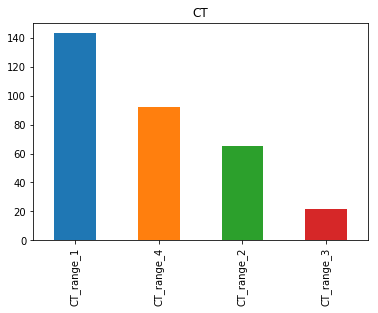

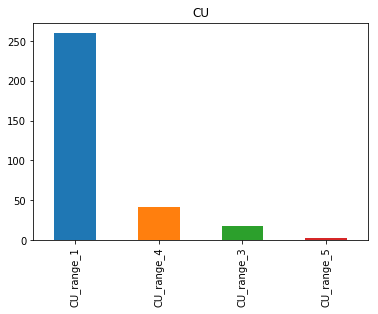

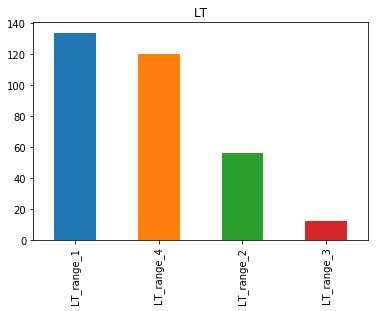

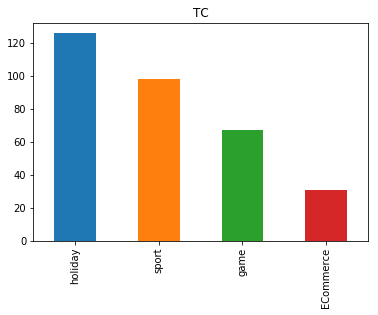

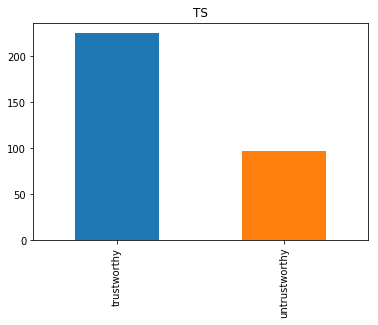

In [222]:
header = ['CT','CU', 'LT', 'TC', 'TS']
internet_raw = pd.read_csv('./internet/internet.txt', sep=' ',names=header)
enc = OrdinalEncoder(categories='auto', dtype=int)
enc.fit(internet_raw)
internet=enc.transform(internet_raw)
internet_input = internet[:,0:4]
internet_target = internet[:,4]

for item in header:
    internet_raw[item].value_counts().plot(title = item, kind='bar')
    plt.show()

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def evaluate(clf,x,y, k):

    cvs=cross_val_score(clf,x, y, scoring='accuracy', cv=k)
    score=sum(cvs)/len(cvs)
    print('Avg. 5 fold cross validation accuracy: '+str(score))

    y_pred = cross_val_predict(clf, x, y, cv=5)
    cnf = confusion_matrix(y, y_pred)
    print('Confusion matrix:')
    print(cnf)

### Decision Tree

In [223]:
## DECISION TREE

tclf = tree.DecisionTreeClassifier()
tclf.fit(internet_input,internet_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [224]:
evaluate(tclf,internet_input, internet_target, 5)

Avg. 5 fold cross validation accuracy: 0.9938461538461538
Confusion matrix:
[[225   0]
 [  0  97]]


### Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier

## RANDOM FOREST

rfclf = RandomForestClassifier(n_estimators = 100)
rfclf.fit(adults_input, adults_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [226]:
evaluate(rfclf,internet_input, internet_target, 5)

Avg. 5 fold cross validation accuracy: 1.0
Confusion matrix:
[[225   0]
 [  0  97]]


### Naive Bayes

In [231]:
from sklearn.naive_bayes import GaussianNB

## GAUSSIAN NAIVE BAYES

gnb = GaussianNB()
gnb.fit(internet_input,internet_target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [232]:
evaluate(gnb,internet_input, internet_target,5)

Avg. 5 fold cross validation accuracy: 0.5588461538461539
Confusion matrix:
[[149  76]
 [ 66  31]]


### Support vector machine

In [233]:
from sklearn.svm import SVC

## SUPPORT VECTOR MACHINE

svcl = SVC(gamma='scale')
svcl.fit(internet_input,internet_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [234]:
evaluate(gnb,internet_input, internet_target,5)

Avg. 5 fold cross validation accuracy: 0.5588461538461539
Confusion matrix:
[[149  76]
 [ 66  31]]
